In [20]:
#4DLI is at index 5

import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#rmsd_set already doesn't contain 4DLI
infile = open('../Data/MAPK14_rmsds_2x2grid','rb')
rmsd_set = pickle.load(infile)
infile.close()

infile = open('../Data/MAPK14_ligand_names','rb')
ligands = pickle.load(infile)
infile.close()

infile = open('../Data/MAPK14_gscores','rb')
gscores = pickle.load(infile)
infile.close()

del ligands[5]

In [21]:
self_gscore_pairs = []
self_rmsd_pairs = []
self_simm = 0
self_simm_gscore = 0
self_simm_rmsd = 0
self_gscore_rmsds = []
rmsd = []

for i in range(len(ligands)):
    arr = []
    for j in range(len(ligands)):
        arr.append(min(rmsd_set[i][j][:]))
    rmsd.append(arr)

np_rmsd = np.array(rmsd)

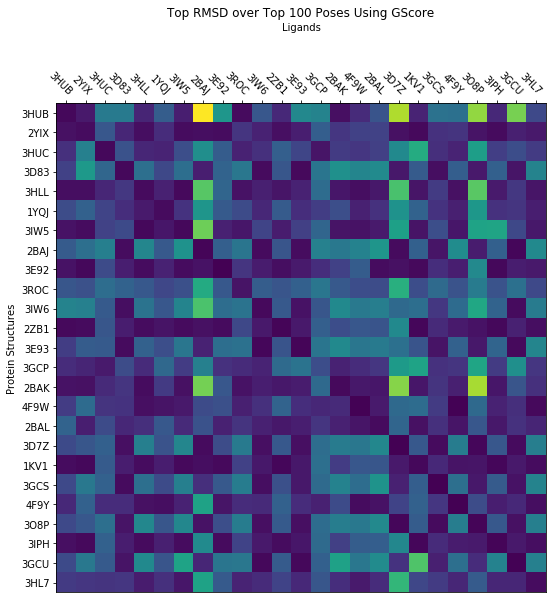

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

D=np_rmsd

fig, ax = plt.subplots()
im = ax.imshow(D)

# We want to show all ticks...
ax.set_xticks(np.arange(len(ligands)))
ax.set_yticks(np.arange(len(ligands)))
# ... and label them with the respective list entries
ax.set_xticklabels(ligands)
ax.set_yticklabels(ligands)
ax.xaxis.tick_top()

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=315, ha="right",
         rotation_mode="anchor")

ax.set_title("Top RMSD over Top 100 Poses Using GScore")
ax.set_xlabel('Ligands', labelpad = -570)
ax.set_ylabel('Protein Structures')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.show()

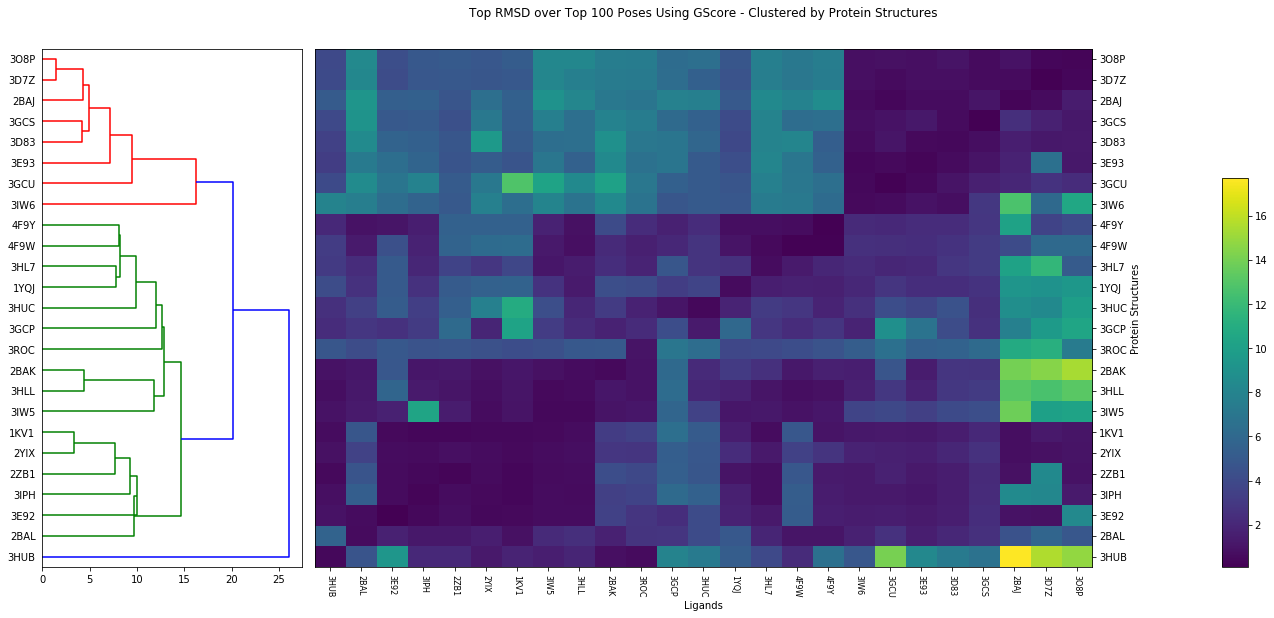

In [23]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Generate features and distance matrix.
D = np_rmsd

# Compute and plot dendrogram.
fig = pylab.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(D, method='centroid')
labelList = ligands
Z = sch.dendrogram(Y, orientation='right', labels=labelList)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']

x_ligands = []
for i in range(len(index)):
    x_ligands.append(ligands[index[i]])
y_ligands = x_ligands

D = D[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks(range(25))
axmatrix.set_xticklabels(x_ligands, minor=False)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()

pylab.xticks(rotation=-90, fontsize=8)

axmatrix.set_yticks(range(25))
axmatrix.set_yticklabels(y_ligands, minor=False)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()

axmatrix.set_title("Top RMSD over Top 100 Poses Using GScore - Clustered by Protein Structures")
axmatrix.set_xlabel('Ligands')
axmatrix.set_ylabel('Protein Structures')

# Plot colorbar.
axcolor = fig.add_axes([1.0,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
#fig.savefig('dendrogram_all_pose_protein.png')

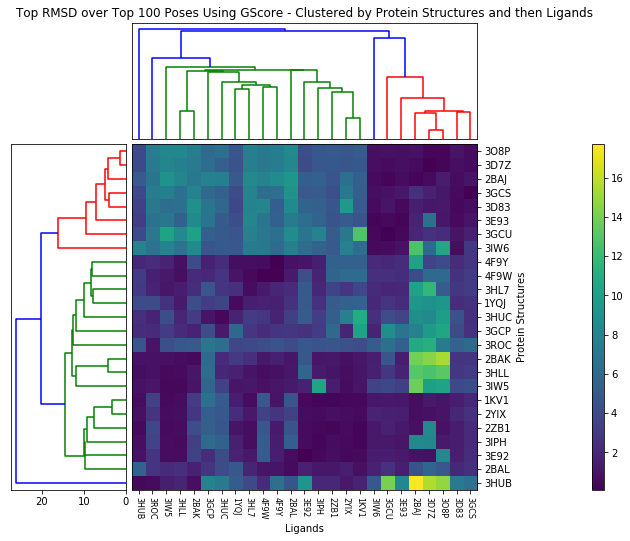

In [24]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
import pandas as pd

# Generate features and distance matrix.
D = np_rmsd
condensedD = D

# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(condensedD, method='centroid')
labelList = ligands
Z1 = sch.dendrogram(Y, orientation='left', labels=labelList)
# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(condensedD, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
y_ligands = []
for i in range(len(idx1)):
    y_ligands.append(ligands[idx1[i]])
x_ligands = []
for i in range(len(idx2)):
    x_ligands.append(ligands[idx2[i]])
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks(range(25))
axmatrix.set_xticklabels(x_ligands, minor=False)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()

pylab.xticks(rotation=-90, fontsize=8)

axmatrix.set_yticks(range(25))
axmatrix.set_yticklabels(y_ligands, minor=False)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()

axmatrix.set_title("Top RMSD over Top 100 Poses Using GScore - Clustered by Protein Structures and then Ligands", pad = 110)
axmatrix.set_xlabel('Ligands')
axmatrix.set_ylabel('Protein Structures')

# Plot colorbar.
axcolor = fig.add_axes([1.1,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
#fig.savefig('dendrogram_all_pose_protein_and_ligand.png')